### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

### Load Dataset

In [7]:
# Memanggil dataset train & test
df_train = pd.read_excel('../data/kelulusan_train.xls')
df_test = pd.read_excel('../data/kelulusan_test.xls')

In [8]:
# Menampilkan 5 data teratas dari dataset train
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [9]:
# Menampilkan 5 data teratas dari dataset test
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [10]:
# Mellihat Informasi Dataset Train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [11]:
# Melihat Informasi data test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


### Data Cleaning

In [12]:
# Melihat nilai unique dari masing masing kategorikal

print(df_train['JENIS KELAMIN'].unique())
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['STATUS KELULUSAN'].unique())

['PEREMPUAN' 'LAKI - LAKI']
['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['TERLAMBAT' 'TEPAT']


In [ ]:
# Menghapus kolom yang tidak diperlukan dimasing masing dataset
df_train.drop(columns=['STATUS NIKAH'], inplace=True)
df_test.drop(columns=['STATUS NIKAH'], inplace=True)

In [ ]:
# Melakukan encoding pada data Training
replacements = {
    'JENIS KELAMIN': {'LAKI - LAKI': 1, 'PEREMPUAN': 0},
    'STATUS MAHASISWA': {'MAHASISWA': 0, 'BEKERJA': 1},
    'STATUS KELULUSAN': {'TERLAMBAT': 1, 'TEPAT': 0}
}
df_train = df_train.replace(replacements)
df_train.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30620\1466636522.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [16]:
# Melakukan encoding pada data Test
df_test = df_test.replace(replacements)
df_test.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30620\2453365430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,0,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,0
1,LEYLA TRIYANA PRATIWI,0,0,26,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,0
2,VERIS SOFIYAN PRAYOGA,1,0,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,0
3,ADITYA AKBAR NUGRAHA,1,0,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,0
4,ERNA EKA RIYANTI,0,0,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,0


In [17]:
# Mengecek Data Kosong pada dataset train
df_train.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [18]:
# Mengecek Data Kosong pada dataset test
df_test.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               4
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [20]:
# Menghapus baris dengan nilai null pada dataset train
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

# Menghapus baris dengan nilai null pada dataset test
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

In [21]:
# Mengecek Kembali Data Kosong pada dataset train
df_train.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [22]:
# Mengecek Kembali Data Kosong pada dataset train
df_train.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [ ]:
# Menghapus Kolom yang tidak diperlukan dalam analisis pada dataset train
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,28,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,1


In [24]:
# Menghapus Kolom yang tidak diperlukan dalam analisis pada dataset test
df_test = df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,24,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,0


### Analisis Korelasi

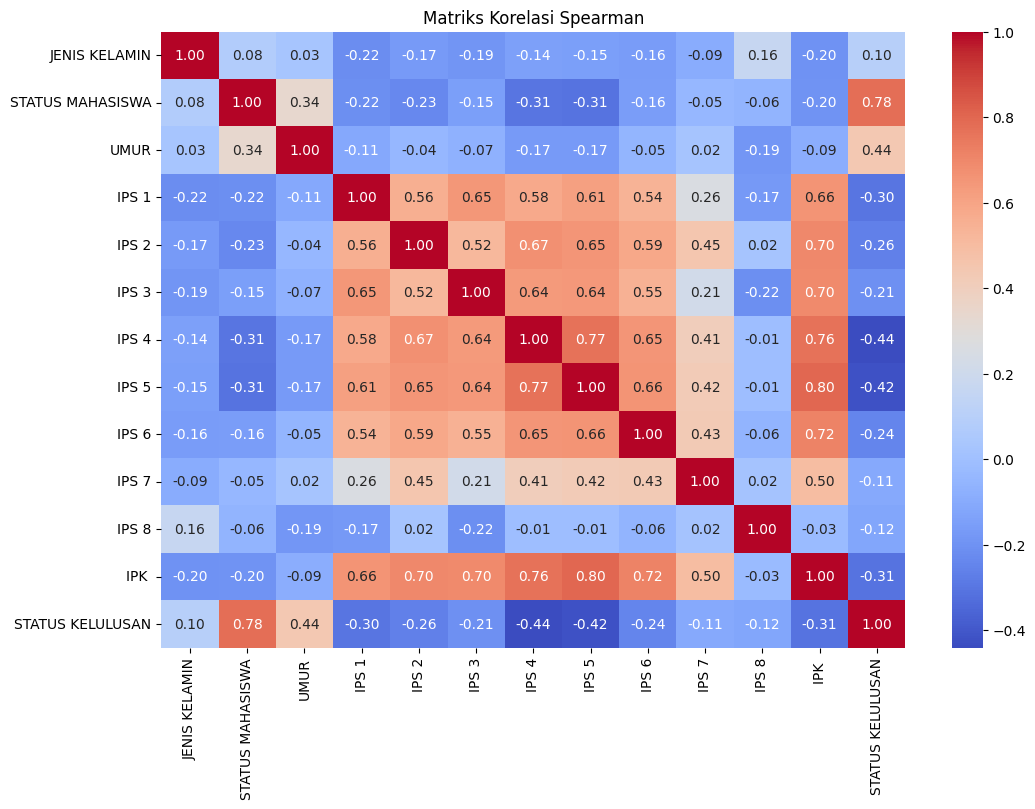

In [25]:
# Menghitung matriks korelasi menggunakan Spearman
correlation_matrix = df_train.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Matriks Korelasi Spearman')
plt.show()

### Visualisasi Distribusi Status Kelulusan

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30620\2972577376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')


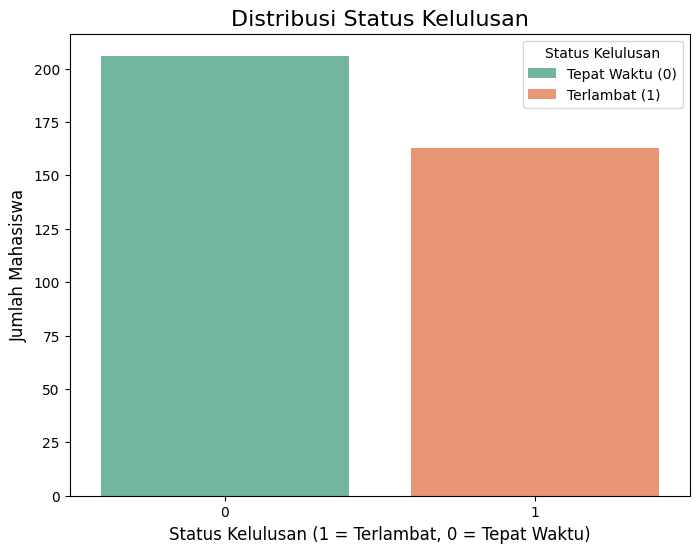

In [26]:
# Membuat Diagram Batang untuk Status Kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')

# Menambahkan judul dan label
plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = Terlambat, 0 = Tepat Waktu)', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# Menambahkan legend (adjusted labels for correctness)
plt.legend(title='Status Kelulusan', labels=['Tepat Waktu (0)', 'Terlambat (1)'], loc='upper right')

# Menampilkan plot
plt.show()

### Modeling

##### Pemisahan data dan Normalisasi

In [27]:
# Data yang dilatih
x_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN']

# Data Validasi
x_test = df_test.drop(columns=['STATUS KELULUSAN'])
y_test = df_test['STATUS KELULUSAN']

# Normalisasi fitur after splitting
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##### Menangani Ketidakseimbangan Kelas dengan SMOTE

In [28]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 1
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
STATUS KELULUSAN
0    206
1    163
Name: count, dtype: int64
After SMOTE:
STATUS KELULUSAN
1    206
0    206
Name: count, dtype: int64


##### Menentukan Parameter Terbaik (Hyperparameter Tuning)

In [30]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Cross-validation Score: 0.9029973552747576


##### Melatih Model KNN Terbaik dan Melakukan Prediks

In [31]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_smote, y_train_smote)

# Prediksi
y_pred = best_knn.predict(x_test_scaled)

##### Evaluasi Model dengan Classification Report 

In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00         2

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



##### Evaluasi dengan Confusion Matrix

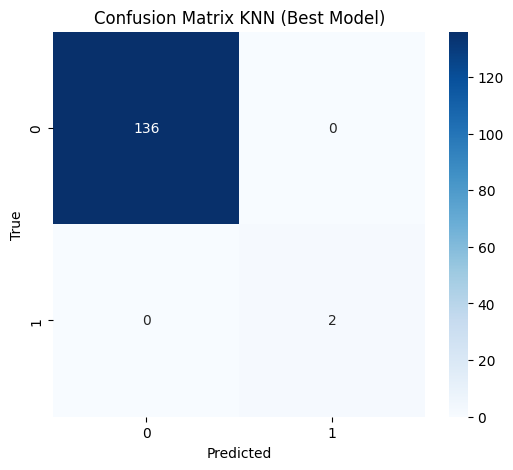

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### Validasi Model dengan Cross Validation

In [34]:
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)
print("Cross-validation scores:", cv_scores.mean())
print("Std dev:", cv_scores.std())

Cross-validation scores: 0.9029973552747576
Std dev: 0.042371318661662674


##### Menentukan Nilai K Optimal dengan Elbow Method 

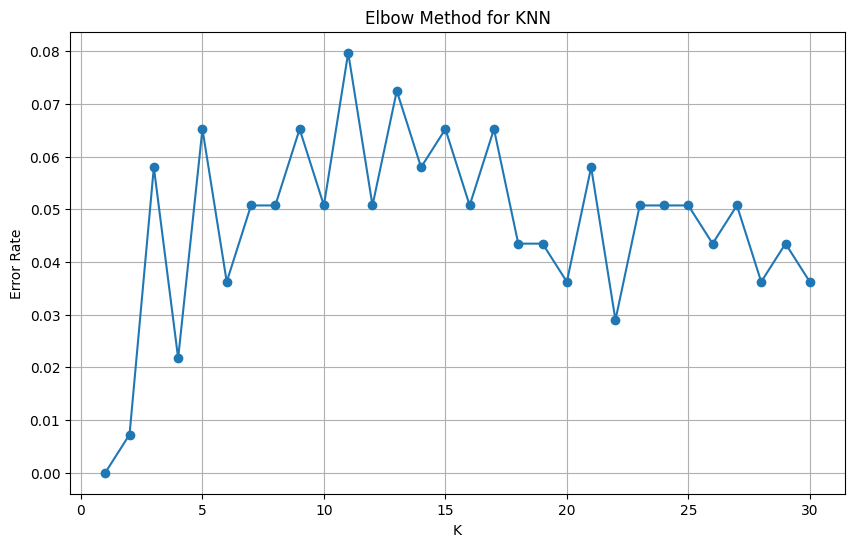

In [35]:
errors = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_smote, y_train_smote)
    pred = knn.predict(x_test_scaled)
    errors.append(np.mean(pred != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()